# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [4]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *
from modules.class_basics import *

## Options

In [5]:
with open(DATA_PATH/'feats.pkl', 'rb') as fin:
    train_feats = pickle.load(fin)

In [6]:
n_models = 10
patience = 2
max_epochs = 200

ensemble_size = 10
ensemble_mode = 'loss'

compile_args = {'loss':'binary_crossentropy', 'optimizer':'adam'}
train_params = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
model_params = {'version':'modelSwish', 'n_in':len(train_feats), 'compile_args':compile_args, 'mode':'classifier'}

print ("\nTraining on", len(train_feats), "features:", [var for var in train_feats])


Training on 31 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [8]:
with open(DATA_PATH/'input_pipe.pkl', 'rb') as fin:
    input_pipe = pickle.load(fin)

In [9]:
train_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'train.hdf5', "r+"),
                             input_pipe=input_pipe, rot_mult=16)

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 24.654s 


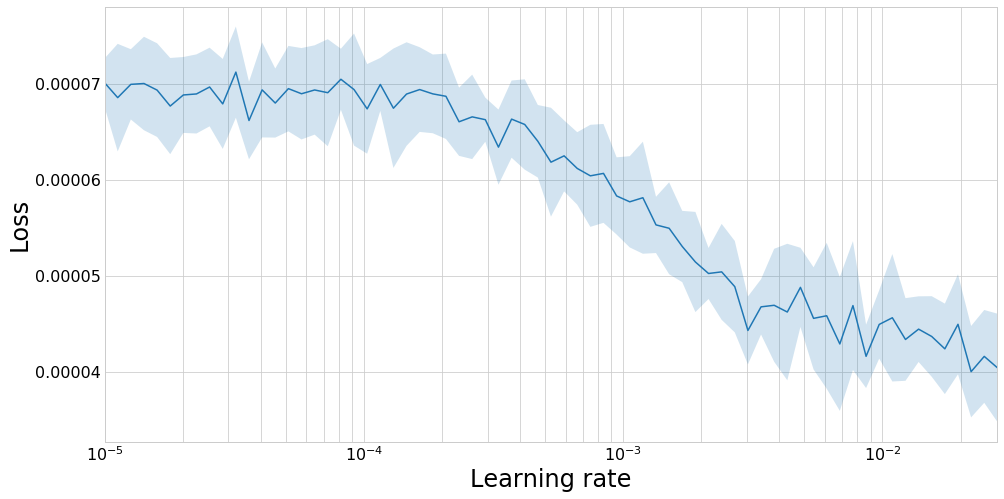

______________________________________



In [11]:
lr_finder = fold_lr_find(train_fy, get_model, model_params, train_params,
                         lr_bounds=[1e-5,1e-1], train_on_weights=True, verbose=0)

## Train classifier

In [12]:
model_gen_params = {**model_params, 'compile_args':{**compile_args, 'lr':2e-3}}
use_callbacks = {'CosAnnealLR':{'cycle_mult':2, 'reverse':False, 'redux_decay':True}}
ams_args = {'n_total':250000, 'br':10, 'delta_b':0}
plots = ['history', 'lr']

Training using weights
Training model 1 / 10
Using cosine LR annealing
2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.475101). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.237954). Check your callbacks.
  % delta_t_median)


1 New best found: 3.952966059666633e-05
2 New best found: 3.584947387395796e-05
3 New best found: 3.515464512243318e-05
5 New best found: 3.440512534941157e-05
6 New best found: 3.3928050681162484e-05
7 New best found: 3.376479281543243e-05
10 New best found: 3.344899874996659e-05
11 New best found: 3.33150097120123e-05
12 New best found: 3.330602383295988e-05
13 New best found: 3.290046359508242e-05
14 New best found: 3.274863242459763e-05
24 New best found: 3.270492889822022e-05
25 New best found: 3.258007104654778e-05
26 New best found: 3.232723021517429e-05
27 New best found: 3.2262803872254255e-05
28 New best found: 3.216380562845561e-05
29 New best found: 3.213491746598318e-05
30 New best found: 3.212470907916083e-05
31 New best found: 3.211952791291055e-05
50 New best found: 3.196329630490933e-05
52 New best found: 3.192366699009002e-05
53 New best found: 3.179911021468042e-05
56 New best found: 3.175706396746574e-05
57 New best found: 3.172561934704256e-05
58 New best found: 3.

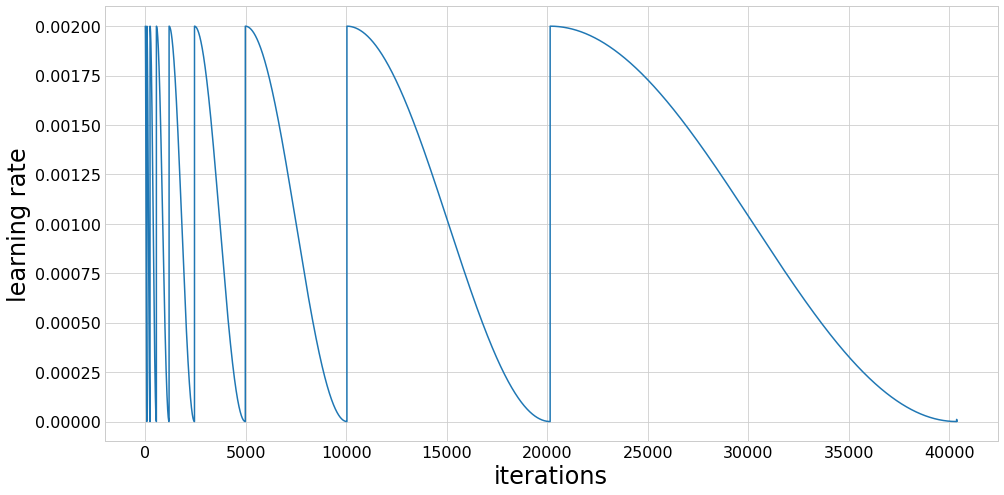

Fold took 644.824s

Training model 2 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.504778). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.252811). Check your callbacks.
  % delta_t_median)


1 New best found: 4.037415121184863e-05
2 New best found: 3.6572577715357705e-05
3 New best found: 3.6042109976596804e-05
5 New best found: 3.529288456316158e-05
6 New best found: 3.451267585867698e-05
7 New best found: 3.4426799932164954e-05
10 New best found: 3.440300553956507e-05
11 New best found: 3.4139407436330584e-05
12 New best found: 3.3616957475185954e-05
13 New best found: 3.340752433935148e-05
14 New best found: 3.3403913411065844e-05
15 New best found: 3.3329098017142626e-05
22 New best found: 3.304149694422043e-05
23 New best found: 3.3026984485810655e-05
24 New best found: 3.269104791873766e-05
27 New best found: 3.26063656987469e-05
28 New best found: 3.248861095046276e-05
30 New best found: 3.244911115657362e-05
47 New best found: 3.2371554478115385e-05
48 New best found: 3.235354357778471e-05
49 New best found: 3.234001272385138e-05
50 New best found: 3.233045759261338e-05
51 New best found: 3.2220816848494843e-05
52 New best found: 3.2135023973136535e-05
53 New best 

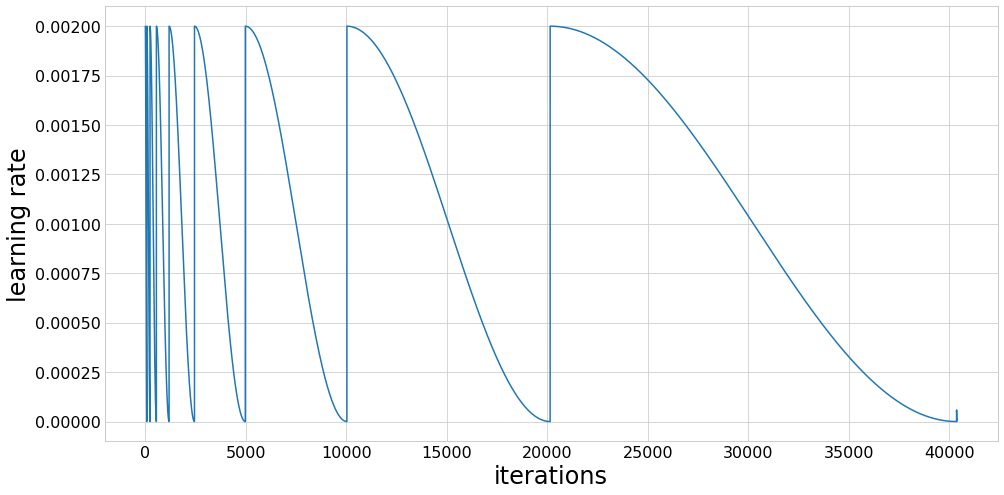

Fold took 653.180s

Training model 3 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.520526). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.260656). Check your callbacks.
  % delta_t_median)


1 New best found: 4.0006790016869377e-05
2 New best found: 3.6150330968450716e-05
3 New best found: 3.547563788317144e-05
4 New best found: 3.531440399664563e-05
5 New best found: 3.493345821195828e-05
6 New best found: 3.430298868128932e-05
7 New best found: 3.413670628813169e-05
10 New best found: 3.3993167413283836e-05
11 New best found: 3.385638816036848e-05
12 New best found: 3.3386289490022254e-05
14 New best found: 3.313154611360906e-05
15 New best found: 3.311560308569158e-05
21 New best found: 3.291015388226085e-05
24 New best found: 3.279997393532233e-05
26 New best found: 3.256504434852651e-05
27 New best found: 3.248883092980487e-05
28 New best found: 3.243235459262863e-05
30 New best found: 3.242449668010179e-05
31 New best found: 3.242009970729677e-05
46 New best found: 3.2247340289159763e-05
49 New best found: 3.2188262187744535e-05
52 New best found: 3.2138416603481973e-05
53 New best found: 3.212056030268029e-05
54 New best found: 3.211568987401054e-05
55 New best foun

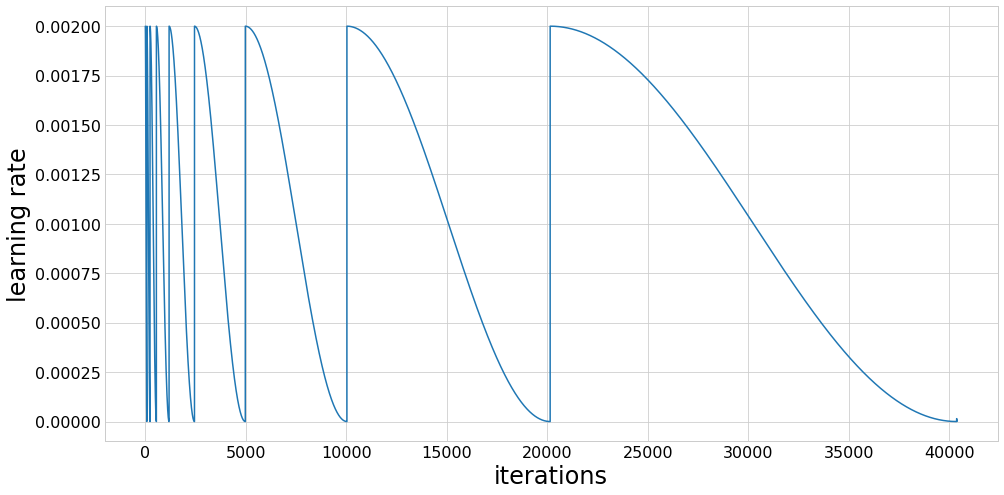

Fold took 660.491s

Training model 4 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.536887). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.268894). Check your callbacks.
  % delta_t_median)


1 New best found: 3.89004329306772e-05
2 New best found: 3.6148954820237124e-05
3 New best found: 3.542446238861885e-05
4 New best found: 3.520468570495723e-05
5 New best found: 3.432549566641683e-05
6 New best found: 3.398558965855045e-05
7 New best found: 3.3962693500507154e-05
11 New best found: 3.3720414142590016e-05
12 New best found: 3.369146500626812e-05
13 New best found: 3.316229753399966e-05
14 New best found: 3.310645289893728e-05
15 New best found: 3.306390775978798e-05
22 New best found: 3.3016442267398814e-05
24 New best found: 3.292990333284251e-05
25 New best found: 3.28288295364473e-05
27 New best found: 3.2615820376668127e-05
30 New best found: 3.25949806443532e-05
31 New best found: 3.2588638592278585e-05
43 New best found: 3.2554275770962706e-05
49 New best found: 3.237236781133106e-05
52 New best found: 3.227537395578111e-05
54 New best found: 3.221560848178342e-05
57 New best found: 3.2135686177934984e-05
58 New best found: 3.211581721843686e-05
59 New best found:

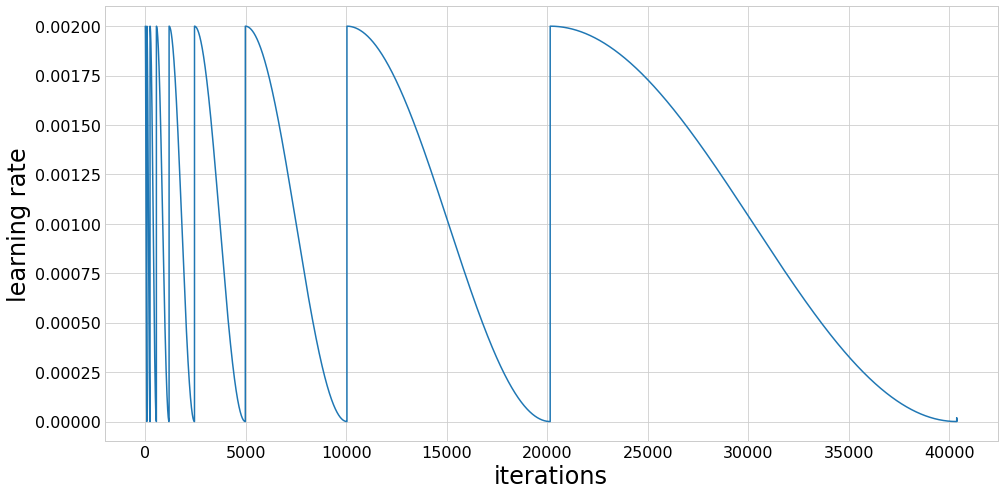

Fold took 663.089s

Training model 5 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.585696). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.293327). Check your callbacks.
  % delta_t_median)


1 New best found: 3.934462369519766e-05
2 New best found: 3.7432034709668804e-05
3 New best found: 3.6404839076537024e-05
4 New best found: 3.6098967464534875e-05
5 New best found: 3.558920440525151e-05
6 New best found: 3.50752809060786e-05
7 New best found: 3.5050902086651e-05
9 New best found: 3.5006310069775706e-05
11 New best found: 3.4541638645756234e-05
12 New best found: 3.422383839069348e-05
13 New best found: 3.401603605153422e-05
15 New best found: 3.398690674399343e-05
23 New best found: 3.379290561283732e-05
24 New best found: 3.36765878442266e-05
25 New best found: 3.342561778323246e-05
29 New best found: 3.3360598288514196e-05
45 New best found: 3.3309951162230856e-05
48 New best found: 3.3272660358704163e-05
50 New best found: 3.322444854186991e-05
52 New best found: 3.3159557998870165e-05
54 New best found: 3.315924009331521e-05
55 New best found: 3.300364645355798e-05
56 New best found: 3.2938387705233615e-05
102 New best found: 3.278907829042762e-05
103 New best foun

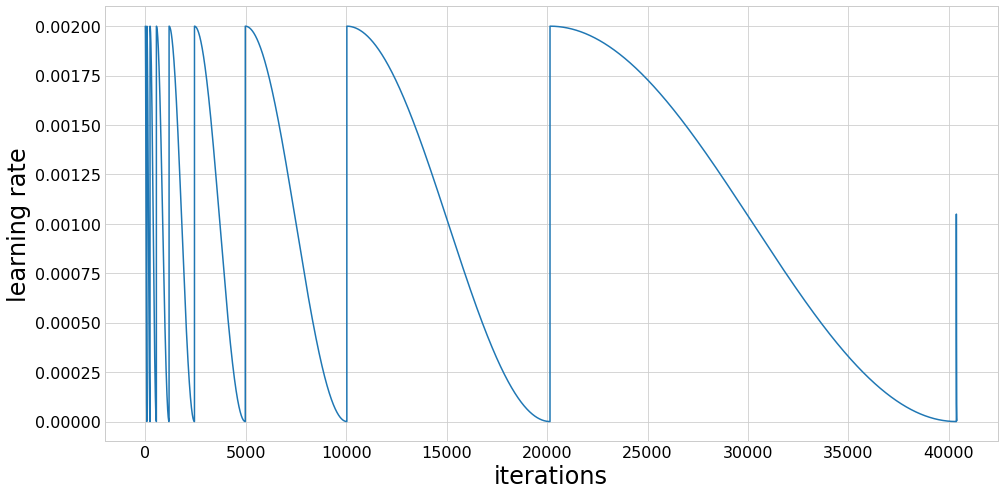

Fold took 697.678s

Training model 6 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.625145). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.313011). Check your callbacks.
  % delta_t_median)


1 New best found: 4.071723016677424e-05
2 New best found: 3.686919139727252e-05
3 New best found: 3.593350966402795e-05
4 New best found: 3.5441513507976194e-05
5 New best found: 3.4934270061785355e-05
6 New best found: 3.443156704888679e-05
7 New best found: 3.437931978696724e-05
11 New best found: 3.3769703828147614e-05
12 New best found: 3.339213690633187e-05
13 New best found: 3.323177939892048e-05
14 New best found: 3.3163214389060155e-05
15 New best found: 3.315869674115674e-05
22 New best found: 3.314822428365005e-05
24 New best found: 3.293971174862236e-05
25 New best found: 3.281654520833399e-05
26 New best found: 3.277902316185646e-05
27 New best found: 3.2760690886061636e-05
28 New best found: 3.268498087418266e-05
29 New best found: 3.2633284025359896e-05
43 New best found: 3.2610741279495416e-05
44 New best found: 3.259024172293721e-05
45 New best found: 3.245992363517871e-05
46 New best found: 3.239389046939323e-05
50 New best found: 3.229306706052739e-05
51 New best foun

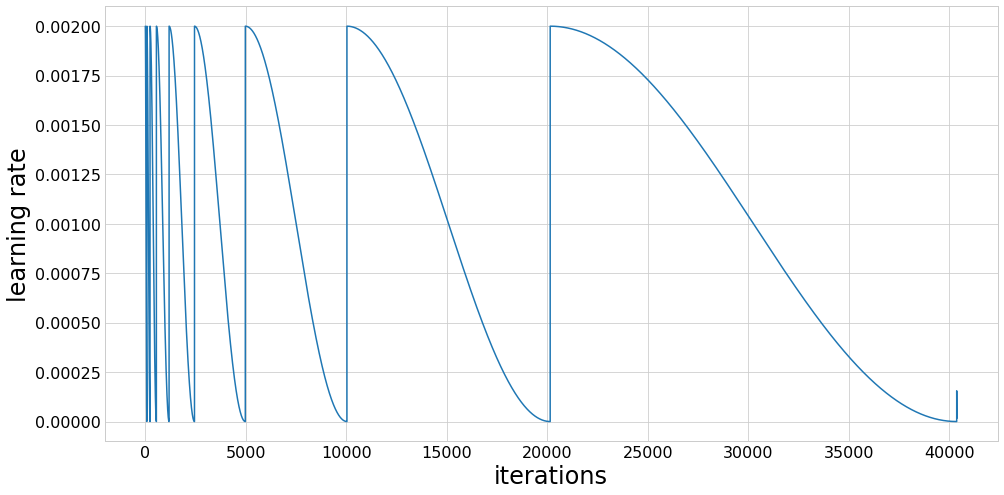

Fold took 681.003s

Training model 7 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.688311). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.344664). Check your callbacks.
  % delta_t_median)


1 New best found: 4.044825229793787e-05
2 New best found: 3.703927339374786e-05
3 New best found: 3.6263937430339864e-05
5 New best found: 3.5180404515995175e-05
6 New best found: 3.457885594834806e-05
7 New best found: 3.446393084304873e-05
10 New best found: 3.4463838992815e-05
11 New best found: 3.403441821428714e-05
13 New best found: 3.388872497889679e-05
14 New best found: 3.369571106450167e-05
15 New best found: 3.368773070687894e-05
21 New best found: 3.365486072434578e-05
24 New best found: 3.348912279689103e-05
25 New best found: 3.33483830516343e-05
26 New best found: 3.325603852863424e-05
27 New best found: 3.321220128273126e-05
28 New best found: 3.313721723243361e-05
29 New best found: 3.3114567116717806e-05
30 New best found: 3.3094540612364654e-05
31 New best found: 3.309113846044056e-05
46 New best found: 3.308503913576715e-05
49 New best found: 3.29604033184296e-05
52 New best found: 3.287990719327354e-05
54 New best found: 3.2873602501058486e-05
55 New best found: 3.

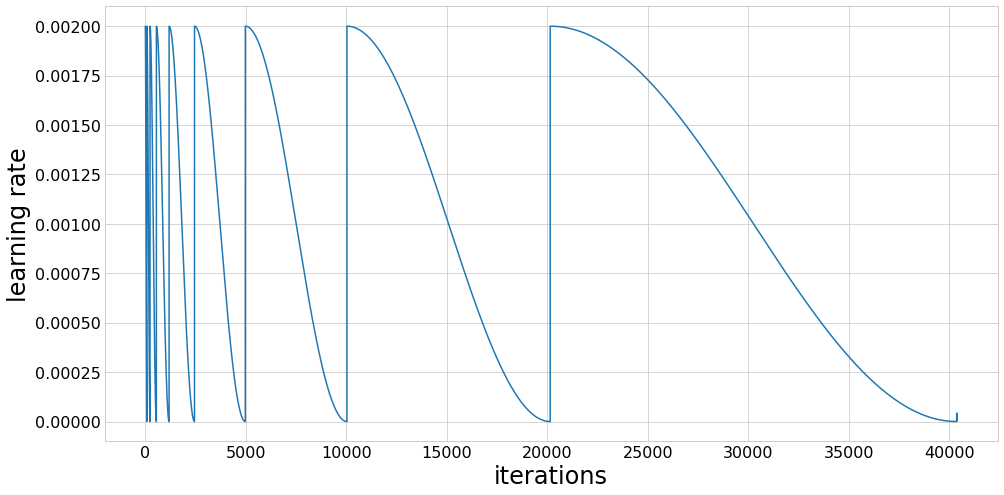

Fold took 693.730s

Training model 8 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.700190). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.350557). Check your callbacks.
  % delta_t_median)


1 New best found: 4.0113061344465044e-05
2 New best found: 3.655120931949086e-05
3 New best found: 3.583401575913299e-05
4 New best found: 3.519342851149101e-05
5 New best found: 3.469638998354964e-05
6 New best found: 3.4431091320492946e-05
7 New best found: 3.419005136680507e-05
10 New best found: 3.3867863513359415e-05
11 New best found: 3.369222279930643e-05
12 New best found: 3.3520665119010274e-05
13 New best found: 3.329812409237444e-05
14 New best found: 3.316706830618958e-05
15 New best found: 3.315516751969386e-05
23 New best found: 3.298051980034368e-05
24 New best found: 3.266665161577102e-05
25 New best found: 3.263219705787412e-05
26 New best found: 3.260638954110805e-05
27 New best found: 3.2445751249067246e-05
28 New best found: 3.2431020164250866e-05
29 New best found: 3.237974319344423e-05
47 New best found: 3.217470424801105e-05
48 New best found: 3.209271390980242e-05
50 New best found: 3.202367561990561e-05
52 New best found: 3.1857276370991525e-05
60 New best foun

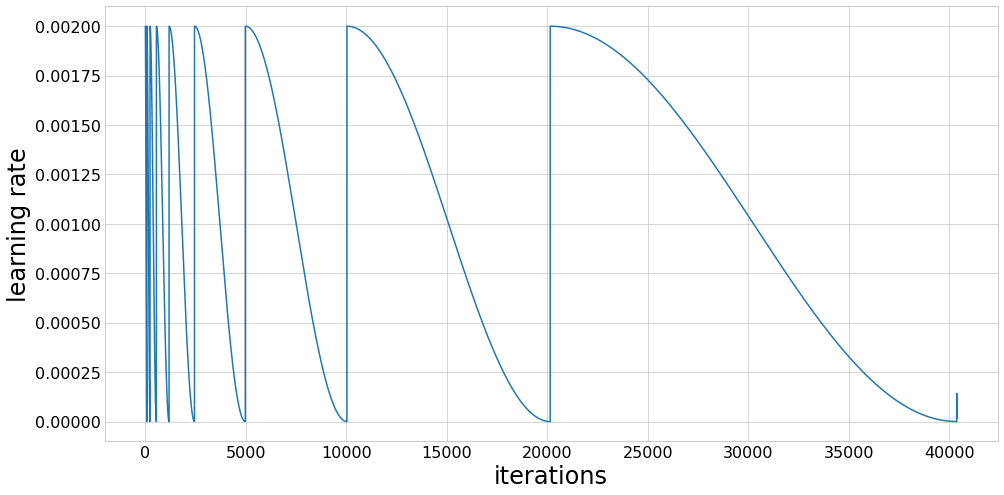

Fold took 698.311s

Training model 9 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.707355). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.354144). Check your callbacks.
  % delta_t_median)


1 New best found: 4.079938081704313e-05
2 New best found: 3.611670257960213e-05
3 New best found: 3.557467212958727e-05
4 New best found: 3.536081470083445e-05
5 New best found: 3.4584918401378675e-05
7 New best found: 3.408417876926251e-05
9 New best found: 3.401290683832485e-05
10 New best found: 3.392664820275968e-05
11 New best found: 3.3822233114915435e-05
12 New best found: 3.336612370767398e-05
13 New best found: 3.3069928133045325e-05
14 New best found: 3.2979754217376464e-05
15 New best found: 3.295501978718676e-05
22 New best found: 3.292328162206104e-05
23 New best found: 3.282236804661807e-05
24 New best found: 3.2711586930963675e-05
26 New best found: 3.2555389466870113e-05
27 New best found: 3.247040983987972e-05
28 New best found: 3.236395423737122e-05
29 New best found: 3.229659075004747e-05
30 New best found: 3.229532335244585e-05
47 New best found: 3.222870185272768e-05
48 New best found: 3.221021124481922e-05
49 New best found: 3.207403083360987e-05
52 New best found

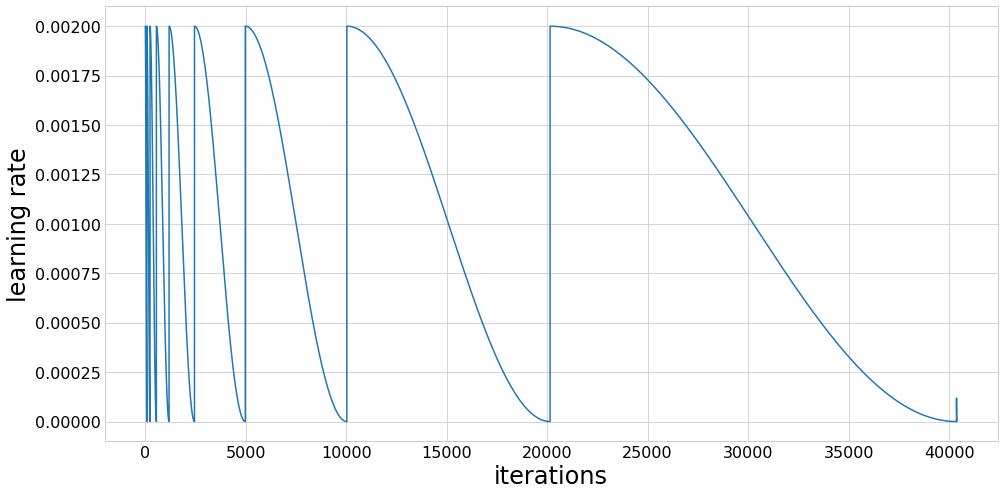

Fold took 715.045s

Training model 10 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.771798). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.386541). Check your callbacks.
  % delta_t_median)


1 New best found: 4.048467559194069e-05
2 New best found: 3.711585148895606e-05
3 New best found: 3.647446891749004e-05
4 New best found: 3.5683409712232664e-05
5 New best found: 3.543214474626191e-05
6 New best found: 3.5203662922536914e-05
7 New best found: 3.491231621690681e-05
9 New best found: 3.490774382772716e-05
11 New best found: 3.454849729189367e-05
12 New best found: 3.402246196321967e-05
13 New best found: 3.3962155786921e-05
14 New best found: 3.385165982379457e-05
15 New best found: 3.3832888410880016e-05
22 New best found: 3.365500676624253e-05
24 New best found: 3.343062694016428e-05
26 New best found: 3.335449723652119e-05
27 New best found: 3.3303570578623184e-05
28 New best found: 3.317101097419578e-05
31 New best found: 3.3167952383669916e-05
50 New best found: 3.283271738739763e-05
53 New best found: 3.282660885338986e-05
55 New best found: 3.274968375103937e-05
58 New best found: 3.272043912358105e-05
59 New best found: 3.271880948129691e-05
60 New best found: 3.

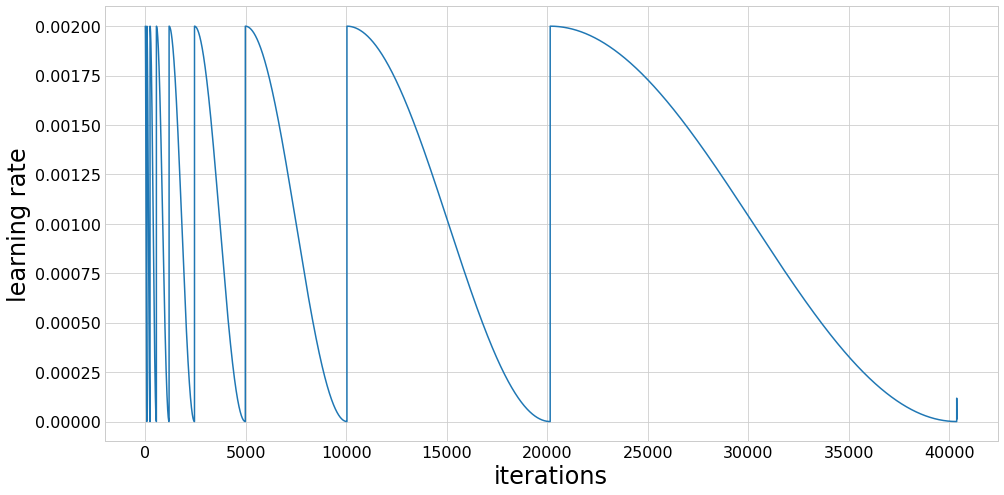

Fold took 709.746s


______________________________________
Training finished
Cross-validation took 6822.628s 


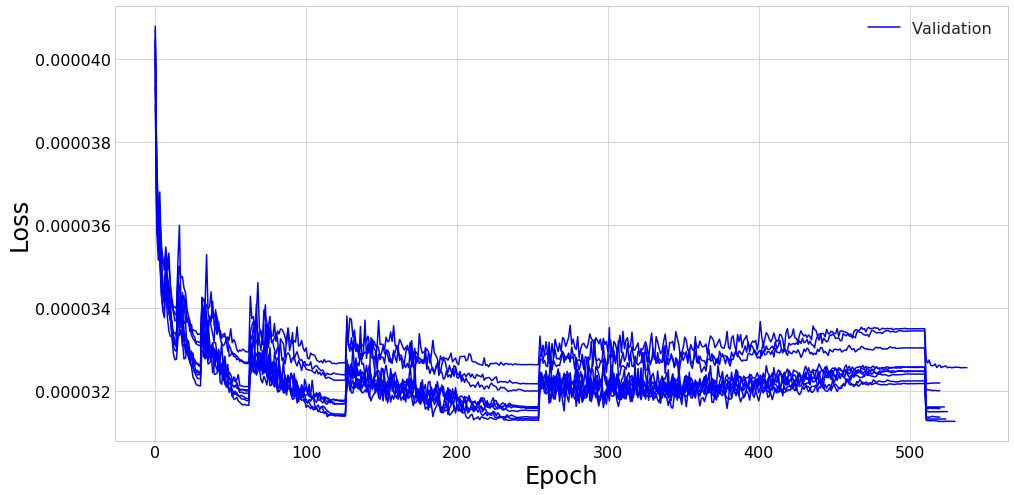

Mean loss = 3.17e-05 +- 1e-07
Mean wAUC = 0.0629 +- 0.0005
Mean AUC = 0.0979 +- 0.0009
Mean AMS = 3.89 +- 0.07
Mean cut = 0.961 +- 0.006
______________________________________



<Figure size 432x288 with 0 Axes>

In [13]:
results, histories = fold_train_model(train_fy, n_models,
                                      model_gen_params=model_gen_params,
                                      train_params=train_params, train_on_weights=True,
                                      use_callbacks=use_callbacks, ams_args=ams_args,
                                      max_epochs=max_epochs, patience=patience,
                                      verbose=1, plots=plots)

The impact of data augmentation is pretty clear. Comparing the training here to that of the the CRL Swish model without augmentation we can see that we effectively gain another LR cycles worth of training epochs before we start overfitting, which allows the networks to reach much lower looses (3.18e-5 c.f. 3.23e-5) and a higher AMSs (3.98 c.f. 3.71)

## Construct ensemble

In [14]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [15]:
ensemble, weights = assemble_ensemble(results, ensemble_size, ensemble_mode, compile_args)

Choosing ensemble by loss
Model 0 is 8 with loss = 3.125944673374761e-05
Model 1 is 0 with loss = 3.131802644339739e-05
Model 2 is 7 with loss = 3.1334297870148254e-05
Model 3 is 1 with loss = 3.1489397247884736e-05
Model 4 is 5 with loss = 3.154893606406404e-05
Model 5 is 3 with loss = 3.1586296805471644e-05
Model 6 is 2 with loss = 3.160842596088877e-05
Model 7 is 9 with loss = 3.198134248682146e-05
Model 8 is 6 with loss = 3.2168924513825915e-05
Model 9 is 4 with loss = 3.2554562398472885e-05


## Response on validation data without TTA

In [16]:
val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))

In [17]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.002561545962095261s per sample

Predicting fold 2 out of 10
Prediction took 0.00041209289878606795s per sample

Predicting fold 3 out of 10
Prediction took 0.0004039663426578045s per sample

Predicting fold 4 out of 10
Prediction took 0.0004143305666744709s per sample

Predicting fold 5 out of 10
Prediction took 0.00040802543759346007s per sample

Predicting fold 6 out of 10
Prediction took 0.0004104280650615692s per sample

Predicting fold 7 out of 10
Prediction took 0.00041319740787148476s per sample

Predicting fold 8 out of 10
Prediction took 0.0004062970362603664s per sample

Predicting fold 9 out of 10
Prediction took 0.00041300165578722956s per sample

Predicting fold 10 out of 10
Prediction took 0.00040609317645430565s per sample



In [18]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source)),
                                                           roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source), sample_weight=get_feature('weights', val_fy.source))))

Testing ROC AUC: unweighted 0.9040907335124367, weighted 0.9363856346825932


In [19]:
ams_scan_slow(convert_to_df(val_fy.source), br=10, w_factor=250000/50000)

50000 candidates loaded


(4.03905896270267, 0.9615953)

In [20]:
%%time
bootstrap_mean_calc_ams(convert_to_df(val_fy.source), br=10, w_factor=250000/50000, N=512)

50000 candidates loaded

Mean calc_ams=4.1+-0.2, at mean cut of 0.962+-0.008
Exact mean cut 0.9620843307347968, corresponds to calc_ams of 4.022043740464112
CPU times: user 2.37 s, sys: 15.2 s, total: 17.6 s
Wall time: 2min 8s


(4.1, 0.962)

With test-time augmentation we improve on 4_Model_Swish_Cyclical-LR in all metrics on validation data: overall AMS 3.77->3.90, AMS corresponding to mean cut 3.72->3.89.

## Response on validation data with TTA

In [21]:
val_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'val.hdf5', "r+"), input_pipe=input_pipe,
                                  rotate = True, reflect = True, rot_mult=8)

In [22]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.013891730602085591s per sample

Predicting fold 2 out of 10
Prediction took 0.01381525872424245s per sample

Predicting fold 3 out of 10
Prediction took 0.013761612576246262s per sample

Predicting fold 4 out of 10
Prediction took 0.014147164165973664s per sample

Predicting fold 5 out of 10
Prediction took 0.013839034365117549s per sample

Predicting fold 6 out of 10
Prediction took 0.013659249944239855s per sample

Predicting fold 7 out of 10
Prediction took 0.013809884341806173s per sample

Predicting fold 8 out of 10
Prediction took 0.013833953470736743s per sample

Predicting fold 9 out of 10
Prediction took 0.013883281590789557s per sample

Predicting fold 10 out of 10
Prediction took 0.013747602584958076s per sample



In [23]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source)),
                                                           roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source), sample_weight=get_feature('weights', val_fy.source))))

Testing ROC AUC: unweighted 0.9042358691249499, weighted 0.9364426918320121


In [24]:
ams_scan_slow(convert_to_df(val_fy.source), br=10, w_factor=250000/50000)

50000 candidates loaded


(3.993282781970819, 0.96116984)

In [25]:
%%time
bootstrap_mean_calc_ams(convert_to_df(val_fy.source), br=10, w_factor=250000/50000, N=512)

50000 candidates loaded

Mean calc_ams=4.0+-0.2, at mean cut of 0.963+-0.008
Exact mean cut 0.9626221215585247, corresponds to calc_ams of 4.001961301649528
CPU times: user 2.28 s, sys: 15.4 s, total: 17.7 s
Wall time: 2min 9s


(4.0, 0.963)

Adding test-time augmentation provides further benefits: overall AMS 3.90->3.97, AMS corresponding to mean cut 3.89->3.91.

# Test scoring - Without TTA

In [26]:
test_fy = FoldYielder(h5py.File(DATA_PATH/'testing.hdf5', "r+"))

In [27]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.0004023285828530788s per sample

Predicting fold 2 out of 10
Prediction took 0.00040538844364610587s per sample

Predicting fold 3 out of 10
Prediction took 0.00040616669580340384s per sample

Predicting fold 4 out of 10
Prediction took 0.0004052055335180326s per sample

Predicting fold 5 out of 10
Prediction took 0.00040149338753385977s per sample

Predicting fold 6 out of 10
Prediction took 0.0004065194168551402s per sample

Predicting fold 7 out of 10
Prediction took 0.0004048707531934435s per sample

Predicting fold 8 out of 10
Prediction took 0.00039992414049126886s per sample

Predicting fold 9 out of 10
Prediction took 0.00040242411291057414s per sample

Predicting fold 10 out of 10
Prediction took 0.00040425113168629734s per sample

CPU times: user 3min 58s, sys: 14.7 s, total: 4min 13s
Wall time: 3min 42s


In [28]:
score_test_data(test_fy.source, 0.9620843307347968)

Public:Private AMS: 3.675301488142127 : 3.8078762406773983


(3.675301488142127, 3.8078762406773983)

Using the cuts we optimised by bootstrapping the validation data, we end up with a private score which would have beaten the winning entry (3.817 c.f. 3.806). It would be nice if the public score were higher, though.

# Test scoring - With TTA

In [29]:
test_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'testing.hdf5', "r+"), input_pipe=input_pipe,
                                   rotate = True, reflect = True, rot_mult=8)

In [30]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.013287895544482902s per sample

Predicting fold 2 out of 10
Prediction took 0.01324323849000714s per sample

Predicting fold 3 out of 10
Prediction took 0.01326741504310207s per sample

Predicting fold 4 out of 10
Prediction took 0.013286779228597879s per sample

Predicting fold 5 out of 10
Prediction took 0.013197983374243433s per sample

Predicting fold 6 out of 10
Prediction took 0.013291167992759834s per sample

Predicting fold 7 out of 10
Prediction took 0.01322653165777976s per sample

Predicting fold 8 out of 10
Prediction took 0.013184622601893814s per sample

Predicting fold 9 out of 10
Prediction took 0.013130792724408886s per sample

Predicting fold 10 out of 10
Prediction took 0.01319214157407934s per sample

CPU times: user 2h 10min 54s, sys: 9min 29s, total: 2h 20min 23s
Wall time: 2h 1min 17s


In [31]:
score_test_data(test_fy.source, 0.9626221215585247)

Public:Private AMS: 3.695148600696799 : 3.794060864733273


(3.695148600696799, 3.794060864733273)

In [43]:
score_test_data(test_fy.source, 0.959)

Public:Private AMS: 3.7535289963831797 : 3.8216251248354585


(3.7535289963831797, 3.8216251248354585)

Using the cuts we optimised by bootstrapping the validation data, we end up with a private score which would have beaten the winning entry (3.817 c.f. 3.806). It would be nice if the public score were higher, though.

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA"

In [ ]:
saveEnsemble(name, ensemble, weights, compile_args, overwrite=1)

In [ ]:
ensemble, weights, compile_args, _, _ = loadEnsemble(name)